In [160]:
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn
import re
from urllib.parse import urlparse
import ipaddress
import numpy as np

# 데이터 로드
data = pd.read_csv('C:/Users/임진성/Desktop/LSTM_V1/your_data.csv')
data

malicious_data=data
malicious_data['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [162]:
type_mapping = {
    'malware': 3,
    'defacement': 2,
    'phishing': 1,
    'benign': 0
}
malicious_data['type'] = malicious_data['type'].map(type_mapping)
malicious_data

,url,type
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,2
4,http://adventure-nicaragua.net/index.php?optio...,2
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1
651188,www.gamespot.com/xbox360/action/deadspace/,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1


In [164]:
def get_url_len(url):
    return len(url)

malicious_data['url_length'] = malicious_data['url'].str.len()
malicious_data.head()

,url,type,url_length
0,br-icloud.com.br,1,16
1,mp3raid.com/music/krizz_kaliko.html,0,35
2,bopsecrets.org/rexroth/cr/1.htm,0,31
3,http://www.garage-pirenne.be/index.php?option=...,2,88
4,http://adventure-nicaragua.net/index.php?optio...,2,235


In [166]:
def count_special_chars(url):
    non_alpha_num = re.findall(r'\W',url)
    return len(non_alpha_num)

malicious_data['special_chars_count'] = malicious_data['url'].apply(count_special_chars)
malicious_data

,url,type,url_length,special_chars_count
0,br-icloud.com.br,1,16,3
1,mp3raid.com/music/krizz_kaliko.html,0,35,4
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6


In [169]:
def count_keyword_flags(url):
    # 찾고자 하는 키워드 목록
    keywords = [
        "php", "index", "option", "html", "view", "component"
    ]
    
    # URL을 소문자로 변환
    url_lower = url.lower()
    
    # 각 키워드가 포함되어 있는지 여부를 1 또는 0으로 반환
    return {keyword: (1 if keyword in url_lower else 0) for keyword in keywords}

# 각 URL에 대해 키워드 포함 여부를 데이터프레임으로 변환
keyword_flags_df = malicious_data['url'].apply(count_keyword_flags).apply(pd.Series)

# 기존 데이터프레임에 키워드 포함 여부 데이터프레임을 병합
malicious_data = pd.concat([malicious_data, keyword_flags_df], axis=1)

# 결과 출력
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0


In [124]:
import string
def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

malicious_data['letters_count']        = malicious_data['url'].apply(lambda x: count_letters(x))

In [126]:
def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits

malicious_data['digits_count']         = malicious_data['url'].apply(lambda x: count_digits(x))
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component,letters_count,digits_count
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0,29,1
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0,25,1
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0,63,7
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1,199,22
...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0,21,12
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0,29,7
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0,33,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0,36,0


In [171]:
def check_https(url):
    # URL이 https로 시작하면 True, 아니면 False
    return 1 if url.startswith('https://') else 0

# https 적용 여부를 새로운 열로 추가
malicious_data['https_flag'] = malicious_data['url'].apply(lambda x: check_https(x))

# 결과 확인
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component,https_flag
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0,0


In [173]:
def count_slash(url):
    # '/'의 개수 계산
    return url.count('/')

def count_hyphen(url):
    # '-'의 개수 계산
    return url.count('-')

def count_dot(url):
    # '.'의 개수 계산
    return url.count('.')
    
def count_underscore(url):
    # '_'의 개수 계산
    return url.count('_')

def count_equals(url):
    # '='의 개수 계산
    return url.count('=')

def count_question(url):
    # '_'의 개수 계산
    return url.count('?')

def count_percent(url):
    # '%'의 개수 계산
    return url.count('%')

malicious_data['slash_count'] = malicious_data['url'].apply(lambda x: count_slash(x))
malicious_data['hyphen_count'] = malicious_data['url'].apply(lambda x: count_hyphen(x))
malicious_data['underscore_count'] = malicious_data['url'].apply(lambda x: count_underscore(x))
malicious_data['dot_count'] = malicious_data['url'].apply(lambda x: count_dot(x))
malicious_data['equals_count'] = malicious_data['url'].apply(lambda x: count_equals(x))
malicious_data['question_count'] = malicious_data['url'].apply(lambda x: count_question(x))
malicious_data['percent_count'] = malicious_data['url'].apply(lambda x: count_percent(x))

# 결과 확인
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component,https_flag,slash_count,hyphen_count,underscore_count,dot_count,equals_count,question_count,percent_count
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0,0,0,1,0,2,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0,0,2,0,1,2,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0,0,3,0,0,2,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0,0,3,1,2,3,4,1,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1,0,3,1,1,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0,0,3,0,0,3,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0,0,4,2,0,2,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0,0,4,0,0,2,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0,0,2,0,3,2,0,0,0


In [175]:
from urllib.parse import urlparse, parse_qs

def count_url_parameters(url):
    # Parse the URL using urlparse
    parsed_url = urlparse(url)
    
    # Extract the query part of the URL
    query = parsed_url.query
    
    # Parse the query parameters using parse_qs
    parameters = parse_qs(query)
    
    # Return the number of parameters
    return len(parameters)

malicious_data['param_count'] = malicious_data['url'].apply(count_url_parameters)
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component,https_flag,slash_count,hyphen_count,underscore_count,dot_count,equals_count,question_count,percent_count,param_count
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0,0,2,0,1,2,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0,0,3,1,2,3,4,1,0,4
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1,0,3,1,1,2,3,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0,0,3,0,0,3,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0,0,4,2,0,2,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0,0,4,0,0,2,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0,0,2,0,3,2,0,0,0,0


In [177]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

malicious_data['count_dir'] = malicious_data['url'].apply(lambda i: no_of_dir(i))
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component,https_flag,slash_count,hyphen_count,underscore_count,dot_count,equals_count,question_count,percent_count,param_count,count_dir
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0,0,2,0,1,2,0,0,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,3
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0,0,3,1,2,3,4,1,0,4,1
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1,0,3,1,1,2,3,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0,0,3,0,0,3,0,0,0,0,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0,0,4,2,0,2,0,0,0,0,4
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0,0,4,0,0,2,0,0,0,0,4
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0,0,2,0,3,2,0,0,0,0,2


In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


malicious_data['abnormal_url'] = malicious_data['url'].apply(lambda i: abnormal_url(i))
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component,...,slash_count,hyphen_count,underscore_count,dot_count,equals_count,question_count,percent_count,param_count,count_dir,abnormal_url
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0,...,2,0,1,2,0,0,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0,...,3,0,0,2,0,0,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0,...,3,1,2,3,4,1,0,4,1,1
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1,...,3,1,1,2,3,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0,...,3,0,0,3,0,0,0,0,3,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0,...,4,2,0,2,0,0,0,0,4,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0,...,4,0,0,2,0,0,0,0,4,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0,...,2,0,3,2,0,0,0,0,2,0


In [181]:
malicious_data['count-www'] = malicious_data['url'].apply(lambda i: i.count('www'))
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component,...,hyphen_count,underscore_count,dot_count,equals_count,question_count,percent_count,param_count,count_dir,abnormal_url,count-www
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0,...,0,1,2,0,0,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0,...,0,0,2,0,0,0,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0,...,1,2,3,4,1,0,4,1,1,1
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1,...,1,1,2,3,1,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0,...,0,0,3,0,0,0,0,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0,...,2,0,2,0,0,0,0,4,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0,...,0,0,2,0,0,0,0,4,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0,...,0,3,2,0,0,0,0,2,0,0


In [183]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

malicious_data['sus_url'] = malicious_data['url'].apply(lambda i: suspicious_words(i))
malicious_data

,url,type,url_length,special_chars_count,php,index,option,html,view,component,...,underscore_count,dot_count,equals_count,question_count,percent_count,param_count,count_dir,abnormal_url,count-www,sus_url
0,br-icloud.com.br,1,16,3,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,4,0,0,0,1,0,0,...,1,2,0,0,0,0,2,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,5,0,0,0,0,0,0,...,0,2,0,0,0,0,3,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,16,1,1,1,0,1,0,...,2,3,4,1,0,4,1,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,13,1,1,1,0,0,1,...,1,2,3,1,0,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,6,0,0,0,1,0,0,...,0,3,0,0,0,0,3,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,8,0,0,0,0,0,0,...,0,2,0,0,0,0,4,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,6,0,0,0,0,0,0,...,0,2,0,0,0,0,4,0,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,6,0,0,0,0,0,0,...,3,2,0,0,0,0,2,0,0,0


In [142]:
# 전체 데이터에서 학습(60%) 및 나머지(40%) 나누기
train_data, temp_data = train_test_split(malicious_data, test_size=0.4, random_state=42, stratify=data['type'])

# 나머지 데이터(40%)에서 검증(20%) 및 테스트(20%) 나누기
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['type'])

# 결과 확인
print("학습 데이터 크기:", len(train_data))
print("검증 데이터 크기:", len(val_data))
print("테스트 데이터 크기:", len(test_data))

학습 데이터 크기: 390714
검증 데이터 크기: 130238
테스트 데이터 크기: 130239


In [144]:
trainx = train_data.drop(columns = {'type', 'url' })

x_train = trainx.iloc[:, :].values
print(x_train)
print(x_train.shape)

y_train = np.array(train_data['type'])
y_train = y_train.reshape(-1, 1)
print(y_train)
print(y_train.shape[0])

[[ 39   3   0 ...   0   0   0]
 [ 29   6   0 ...   0   1   0]
 [108  19   1 ...   1   1   0]
 ...
 [ 36   4   0 ...   0   0   0]
 [175  29   1 ...   1   1   0]
 [ 33   4   0 ...   0   1   0]]
(390714, 23)
[[0]
 [1]
 [2]
 ...
 [0]
 [2]
 [1]]
390714


In [146]:
valx = val_data.drop(columns = {'type', 'url'})

x_val = valx.iloc[:, :].values
print(x_val)
print(x_val.shape)

y_val = np.array(val_data['type'])
y_val = y_val.reshape(-1, 1)
print(y_val)
print(y_val.shape[0])

[[ 59   9   0 ...   0   0   0]
 [ 33   5   0 ...   0   0   0]
 [306  15   0 ...   0   0   1]
 ...
 [ 33   6   0 ...   0   0   1]
 [ 15   1   0 ...   0   0   0]
 [ 71   8   0 ...   0   0   0]]
(130238, 23)
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]
130238


In [148]:
testx = test_data.drop(columns = {'type', 'url'})

x_test = testx.iloc[:, :].values
print(x_test)
print(x_test.shape)

y_test = np.array(test_data['type'])
y_test = y_test.reshape(-1, 1)
print(y_test)
print(y_test.shape[0])

[[ 50   6   0 ...   0   0   1]
 [ 29   5   0 ...   0   0   0]
 [ 27   3   0 ...   0   0   0]
 ...
 [120  19   0 ...   0   0   0]
 [ 10   2   0 ...   0   0   0]
 [ 26   5   0 ...   0   0   0]]
(130239, 23)
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
130239


In [150]:
print(malicious_data.shape)
#INPUT 차원 확인용

(651191, 25)


In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  # 필요한 경우 Dense 층도 함께 임포트


model = Sequential([
    Dense(units = 64, activation = 'relu', input_shape=(23,)),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 4, activation = 'softmax')
])

In [154]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [156]:
history = model.fit(x_train, y_train, epochs = 40,batch_size=256, validation_data=(x_val, y_val))

Epoch 1/40
1527/1527 [==============================] - 7s 4ms/step - loss: 0.5231 - accuracy: 0.8352 - val_loss: 0.3192 - val_accuracy: 0.8833
Epoch 2/40
1527/1527 [==============================] - 6s 4ms/step - loss: 0.2953 - accuracy: 0.9034 - val_loss: 0.2750 - val_accuracy: 0.9100
Epoch 3/40
1527/1527 [==============================] - 6s 4ms/step - loss: 0.2586 - accuracy: 0.9154 - val_loss: 0.2474 - val_accuracy: 0.9180
Epoch 4/40
1527/1527 [==============================] - 6s 4ms/step - loss: 0.2383 - accuracy: 0.9200 - val_loss: 0.2289 - val_accuracy: 0.9226
Epoch 5/40
1527/1527 [==============================] - 6s 4ms/step - loss: 0.2225 - accuracy: 0.9268 - val_loss: 0.2355 - val_accuracy: 0.9212
Epoch 6/40
1527/1527 [==============================] - 6s 4ms/step - loss: 0.2089 - accuracy: 0.9332 - val_loss: 0.2063 - val_accuracy: 0.9332
Epoch 7/40
1527/1527 [==============================] - 6s 4ms/step - loss: 0.2031 - accuracy: 0.9350 - val_loss: 0.2006 - val_accuracy:

In [158]:
# 테스트 데이터 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4070/4070 [==============================] - 8s 2ms/step - loss: 0.1514 - accuracy: 0.9497
Test Loss: 0.15142643451690674
Test Accuracy: 0.9497001767158508


Starting model training...
Model training completed.
Calculating Permutation Importance...


Permutation Repeats: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.21s/it]


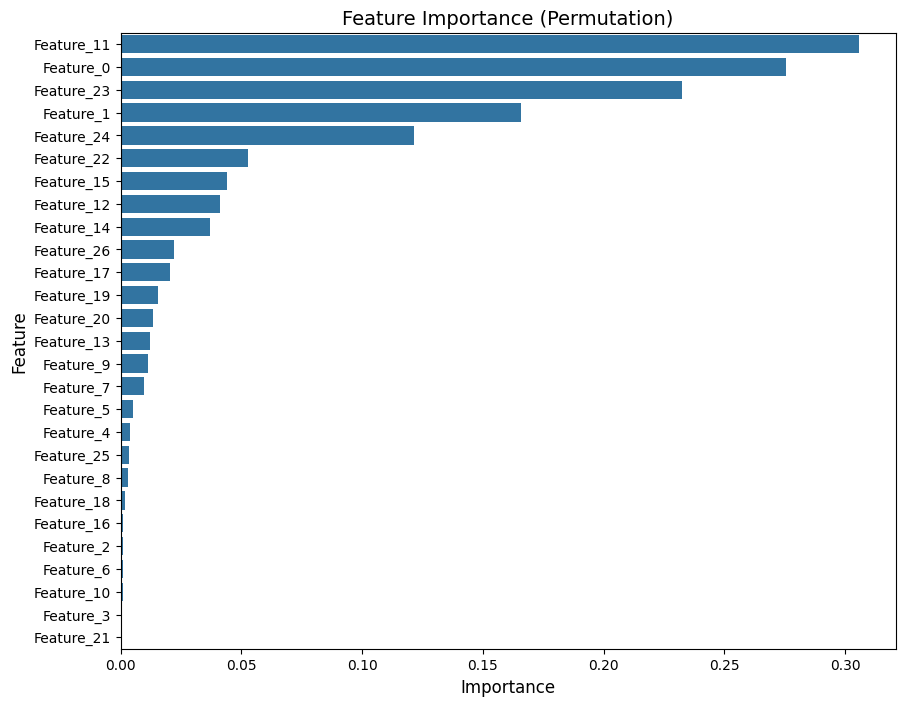

In [97]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils import resample
from tqdm import tqdm

# Keras 모델 생성 함수 정의
def create_model():
    model = Sequential([
        Dense(units=64, activation='relu', input_dim=27),  # input_shape -> input_dim for Sci-Keras
        Dense(units=32, activation='relu'),
        Dense(units=4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Sci-Keras KerasClassifier 사용
sklearn_model = KerasClassifier(model=create_model, epochs=5, batch_size=128, verbose=0)

# 모델 학습
print("Starting model training...")
sklearn_model.fit(x_train, y_train)
print("Model training completed.")

# Validation 데이터 샘플링
x_val_small, y_val_small = resample(x_val, y_val, n_samples=1000, random_state=42)

# Permutation Importance 진행 상황 표시
print("Calculating Permutation Importance...")
results = {}
for i in tqdm(range(3), desc="Permutation Repeats"):
    results = permutation_importance(
        estimator=sklearn_model,
        X=x_val_small,
        y=y_val_small,
        scoring='accuracy',
        n_repeats=3,
        random_state=42
    )

# Feature 중요도 저장
feature_importance = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(x_val.shape[1])],
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

# 상위 Feature 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, orient='h')
plt.title('Feature Importance (Permutation)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [99]:
# x_val의 배열 순서에 맞는 열 이름을 추출
x_val_column_names = list(malicious_data.columns)

# 열 이름 출력
print("x_val 배열의 열 이름 (순서대로):")
for idx, name in enumerate(x_val_column_names):
    print(f"Feature_{idx}: {name}")

x_val 배열의 열 이름 (순서대로):
Feature_0: url
Feature_1: type
Feature_2: url_length
Feature_3: special_chars_count
Feature_4: has_ip
Feature_5: php
Feature_6: index
Feature_7: option
Feature_8: article
Feature_9: html
Feature_10: view
Feature_11: component
Feature_12: content
Feature_13: letters_count
Feature_14: digits_count
Feature_15: https_flag
Feature_16: slash_count
Feature_17: hyphen_count
Feature_18: underscore_count
Feature_19: equals_count
Feature_20: question_count
Feature_21: percent_count
Feature_22: param_count
Feature_23: mal_tld
Feature_24: count_dir
Feature_25: abnormal_url
Feature_26: count-www
Feature_27: sus_url
Feature_28: dot_count


Starting model training...
Model training completed.
Calculating Permutation Importance...


Permutation Iterations: 100%|██████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.06s/it]


Average Feature Importance over 10 iterations:
       Feature  Average Importance
0    Feature_0            0.399500
11  Feature_11            0.312200
23  Feature_23            0.257000
24  Feature_24            0.099400
12  Feature_12            0.082933
1    Feature_1            0.067167
22  Feature_22            0.046200
14  Feature_14            0.019367
13  Feature_13            0.018700
26  Feature_26            0.018533
20  Feature_20            0.012333
15  Feature_15            0.010900
19  Feature_19            0.010900
9    Feature_9            0.008133
17  Feature_17            0.008133
5    Feature_5            0.006000
25  Feature_25            0.004333
21  Feature_21            0.004100
16  Feature_16            0.003200
4    Feature_4            0.002433
8    Feature_8            0.001933
7    Feature_7            0.001767
3    Feature_3            0.001567
6    Feature_6            0.001300
2    Feature_2            0.000267
18  Feature_18           -0.000933
10  Feat

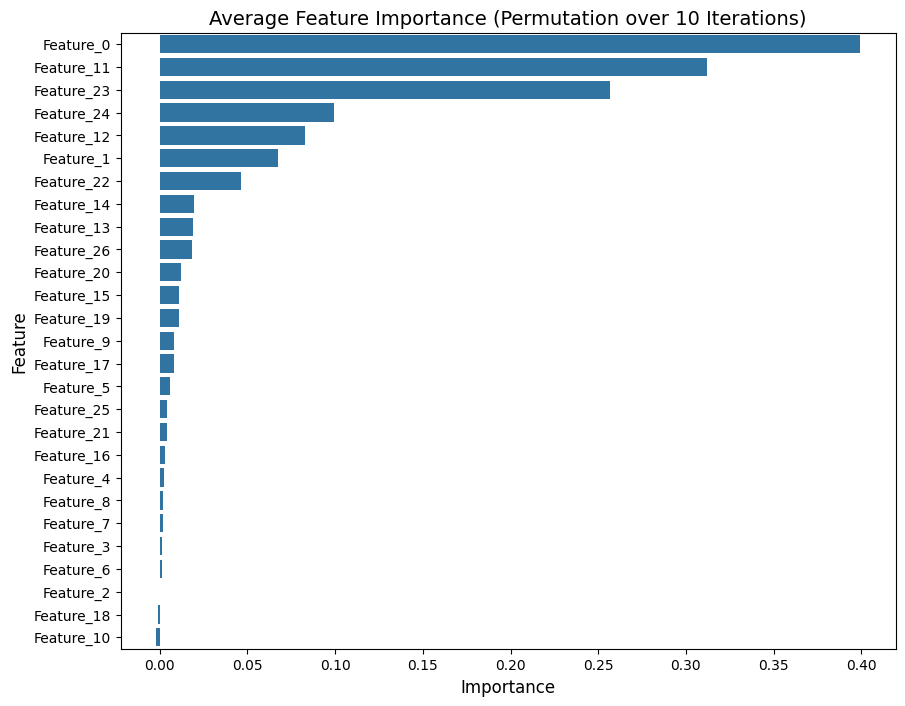

In [111]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils import resample
from tqdm import tqdm

# Keras 모델 생성 함수 정의
def create_model():
    model = Sequential([
        Dense(units=64, activation='relu', input_dim=27),  # input_shape -> input_dim for Sci-Keras
        Dense(units=32, activation='relu'),
        Dense(units=4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Sci-Keras KerasClassifier 사용
sklearn_model = KerasClassifier(model=create_model, epochs=5, batch_size=128, verbose=0)

# 모델 학습
print("Starting model training...")
sklearn_model.fit(x_train, y_train)
print("Model training completed.")

# Validation 데이터 샘플링
x_val_small, y_val_small = resample(x_val, y_val, n_samples=1000, random_state=42)

# Permutation Importance 반복 수행
num_iterations = 10  # Permutation Importance를 10번 수행
all_importances = []

print("Calculating Permutation Importance...")
for i in tqdm(range(num_iterations), desc="Permutation Iterations"):
    results = permutation_importance(
        estimator=sklearn_model,
        X=x_val_small,
        y=y_val_small,
        scoring='accuracy',
        n_repeats=3,
        random_state=i  # 각 반복마다 다른 random_state를 사용
    )
    all_importances.append(results.importances_mean)

# 평균 중요도 계산
average_importances = np.mean(all_importances, axis=0)

# Feature 중요도 저장
feature_importance = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(x_val.shape[1])],
    'Average Importance': average_importances
}).sort_values(by='Average Importance', ascending=False)

# 중요도 결과 출력
print("Average Feature Importance over 10 iterations:")
print(feature_importance)

# 상위 Feature 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Average Importance', y='Feature', data=feature_importance, orient='h')
plt.title('Average Feature Importance (Permutation over 10 Iterations)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()